# 4-second dataset overview

This notebook is to give an overview of the properties of the `below12kHz_cropped` audio classification dataset.
Features:

- Show how to access the data
- Count of class frequency
- Sample plots of some of the classes (wave/spectrogram)

Each line in the txt file `below12kHz_cropped_label.txt` refers to one sample from the dataset, referencing a .wav file and the class label. The name of each wav file gives info as to the original file which the snippet was taken from.

## Forming a list of all class labels in dataset

In [6]:
import csv
# import os

base_path = '/media/michael/Seagate/engage/engage_hackathon_data/data/raw_data/cropped_audio/'
dataset_csv = list(csv.reader(open(base_path + 'below12kHz_cropped_label.txt')))

Y = []  # list of all class labels

for single_file_info in dataset_csv:
    wavpath, start_time, wav_class, _ = single_file_info
    
    Y.append(wav_class.lower().strip())

## Counting the number of occurances of each class

In [7]:
# count the number of items of each class
from collections import Counter
counts = Counter(Y)

# printing nicely
for classname, count in counts.most_common():
    percentage = 100 * float(count) / len(Y)
    print str(classname).ljust(25) + str(count).ljust(10) + ('%0.2f%%' % percentage).ljust(10)
    
print "-" * 45
print "TOTAL".ljust(25) + str(len(Y)).ljust(10)

bird                     4798      52.47%    
mix traffic              1545      16.90%    
braking                  688       7.52%     
blank                    379       4.14%     
rain                     341       3.73%     
voices                   329       3.60%     
unknown sound            240       2.62%     
electrical               235       2.57%     
anthropogenic unknown    159       1.74%     
wing beats               66        0.72%     
airplane                 63        0.69%     
dog bark                 58        0.63%     
beep                     55        0.60%     
bat                      48        0.52%     
metal                    29        0.32%     
bus emitting             18        0.20%     
fox                      17        0.19%     
footsteps                13        0.14%     
mower                    12        0.13%     
whistle                  12        0.13%     
grey squirrel            11        0.12%     
siren                    7        

## Plotting an example spectrogram of each class in the dataset

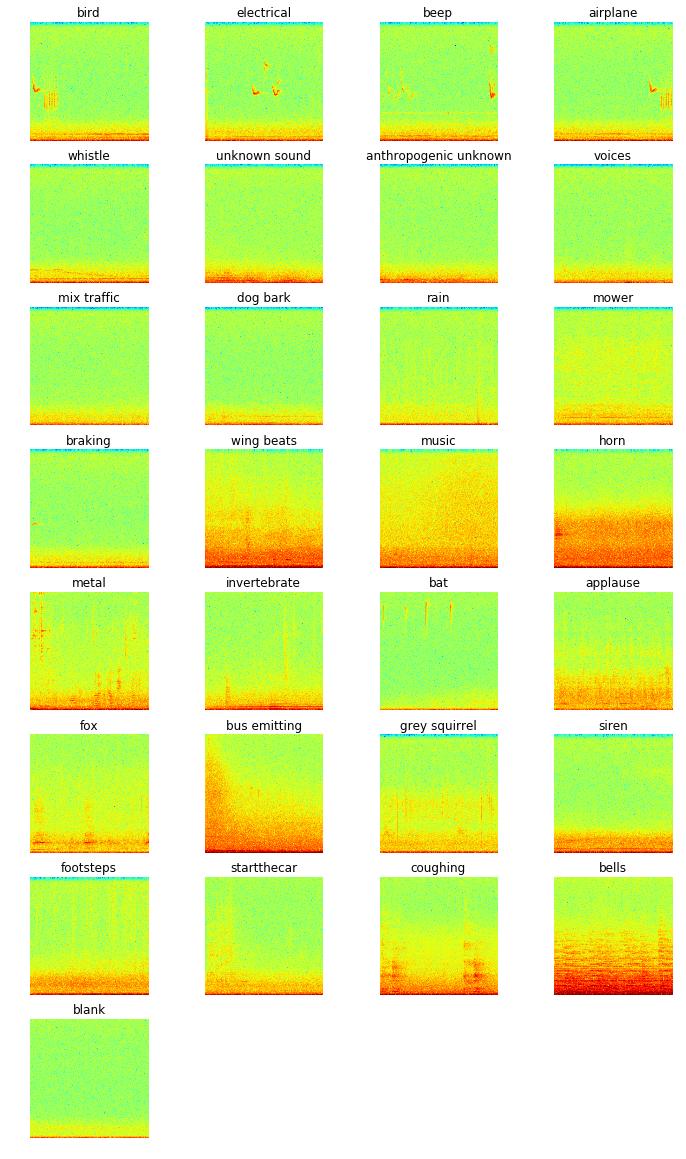

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile
import os
import sys
sys.path.append(os.path.expanduser('~/projects/engaged_hackathon/'))
from engaged.features import frequency

already_plotted = set()  # to keep track of which classes have been plotted
subplot_idx = 1  # which subplot are we plotting to

# working out subplot dimensions
plt.figure(figsize=(12, 20))

# loop through the csv rows
for single_file_info in dataset_csv:
    
    wavpath, _, wav_class, _ = single_file_info
    wav_class = wav_class.lower().strip()
    
    # only plot if we haven't already plotting an example from this class!
    if wav_class not in already_plotted:
        
        # load audio and convert to spectrogram
        sample_rate, wav = wavfile.read(base_path + wavpath)
        spec = frequency.spectrogram(wav, sample_rate, nfft=512, spec_sample_rate=64)
#         spec -= np.median(spec, axis=1)[:, None]
        
        # plot spectrogram to a new subplot
        plt.subplot(rows, columns, subplot_idx)
        plt.imshow(spec)
        plt.gca().invert_yaxis()
        plt.title(wav_class)
        plt.axis('off')
        plt.clim(-2, 13)

        subplot_idx += 1
        
        already_plotted.add(wav_class)